section 1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Compactness_Ratio     768 non-null    float64
 1   Area_Surface          768 non-null    float64
 2   Area_Walls            768 non-null    float64
 3   Area_Roof             768 non-null    float64
 4   Building_Height       768 non-null    float64
 5   Building_Orientation  768 non-null    int64  
 6   Glazing_Area          768 non-null    float64
 7   Glazing_Distribution  768 non-null    int64  
 8   Heating_Demand        768 non-null    float64
 9   Cooling_Demand        768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB
None
       Compactness_Ratio  Area_Surface  Area_Walls   Area_Roof  \
count         768.000000    768.000000  768.000000  768.000000   
mean            0.764167    671.708333  318.500000  176.604167   
std             0.105777     

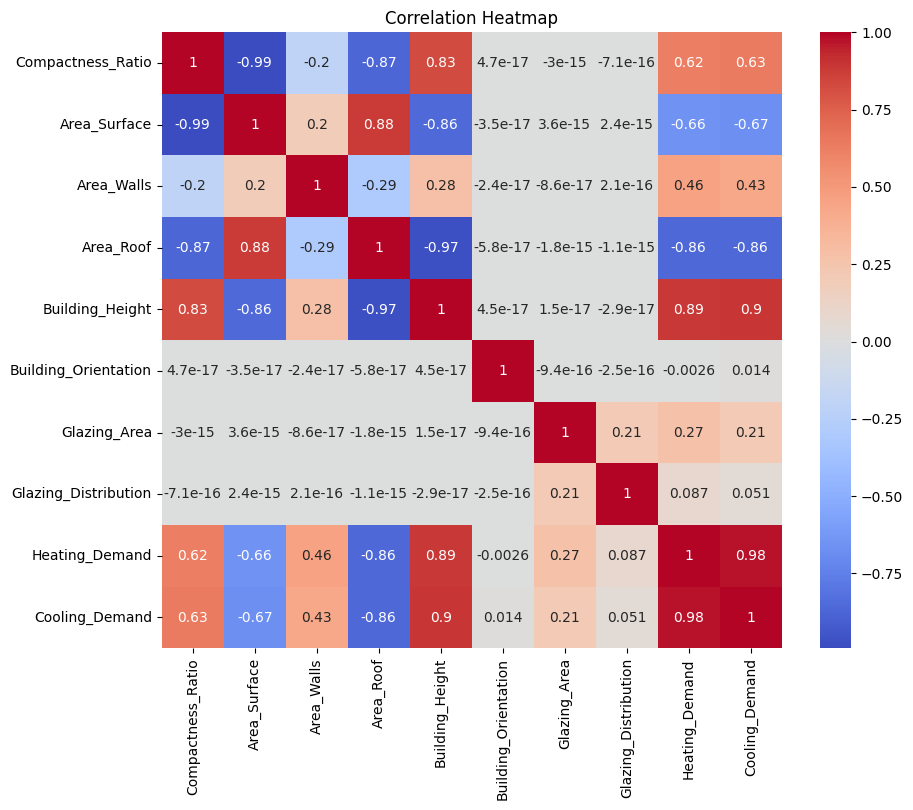

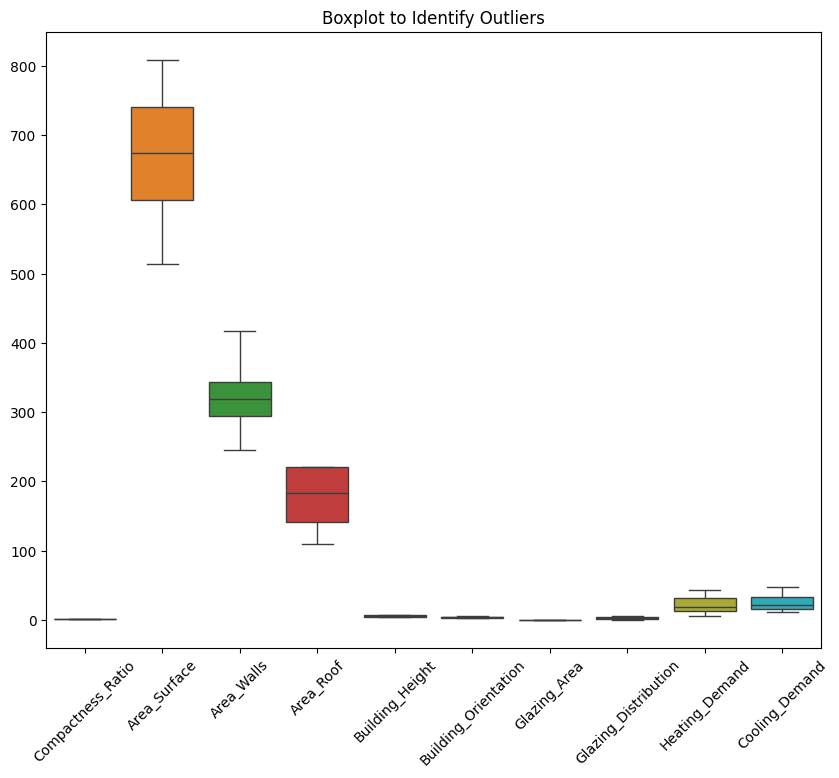

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = './ENB2012_data.xlsx'
data = pd.read_excel(file_path)

# Rename columns for clarity
data.columns = ['Compactness_Ratio', 'Area_Surface', 'Area_Walls', 'Area_Roof',
                'Building_Height', 'Building_Orientation', 'Glazing_Area', 'Glazing_Distribution',
                'Heating_Demand', 'Cooling_Demand']

# Print data information
print(data.info())
print(data.describe())

# Check for missing values
print("Missing values:\n", data.isnull().sum())


# Correlation Heatmap to visualize relationships between variables
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Boxplot to identify potential outliers in the dataset
plt.figure(figsize=(10, 8))
sns.boxplot(data=data)
plt.title("Boxplot to Identify Outliers")
plt.xticks(rotation=45)
plt.show()


section 2 solution

In [55]:
from sklearn.model_selection import train_test_split


# Define features and target variable
X_features = data[['Compactness_Ratio', 'Area_Surface', 'Area_Walls', 'Area_Roof',
                   'Building_Height', 'Building_Orientation', 'Glazing_Area', 'Glazing_Distribution']]
y_target = data['Heating_Demand']

# Split data into training and testing sets (80:20 ratio)
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X_features, y_target, test_size=0.2, random_state=42)

# Output the shape of training and testing datasets
print("Training data shape:", X_train_data.shape)
print("Testing data shape:", X_test_data.shape)
print("Training labels shape:", y_train_data.shape)
print("Testing labels shape:", y_test_data.shape)


Training data shape: (614, 8)
Testing data shape: (154, 8)
Training labels shape: (614,)
Testing labels shape: (154,)


section 3 part a 

In [56]:
# Add bias term (1's) to the feature matrix for manual linear regression
X_train_matrix = np.hstack([np.ones((X_train_data.shape[0], 1)), X_train_data.values])
X_test_matrix = np.hstack([np.ones((X_test_data.shape[0], 1)), X_test_data.values])

# Calculate the weights using Normal Equation
theta_values = np.linalg.inv(X_train_matrix.T @ X_train_matrix) @ X_train_matrix.T @ y_train_data.values

# Predictions using the manual model
y_pred_manual = X_test_matrix @ theta_values

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_data)
X_test_scaled = scaler.transform(X_test_data)

# Checking for NaN and Inf values
print(np.isnan(X_train_scaled).sum(), np.isinf(X_train_scaled).sum())
print(np.isnan(y_train_data).sum(), np.isinf(y_train_data).sum())


0 0
0 0


section 3 part b:

In [57]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Train the Sklearn Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_data, y_train_data)
y_pred_linear = linear_model.predict(X_test_data)

# Train the Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_data, y_train_data)
y_pred_ridge = ridge_model.predict(X_test_data)

# Train the Lasso Regression model
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train_data, y_train_data)
y_pred_lasso = lasso_model.predict(X_test_data)



section 4

Manual Linear Regression

In [58]:
class LinearRegressionScratch:
    def __init__(self):
        self.weights = None

    def fit(self, X, y, learning_rate=0.001, epochs=1000):
        X = np.c_[np.ones(X.shape[0]), X] 
        n_samples, n_features = X.shape
        self.weights = np.random.randn(n_features) * 0.01  

        for epoch in range(epochs):
            predictions = np.dot(X, self.weights)
            errors = predictions - y
            gradients = (2 / n_samples) * np.dot(X.T, errors)
            self.weights -= learning_rate * gradients

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]  
        return np.dot(X, self.weights)

# Train manual linear regression model
manual_model = LinearRegressionScratch()
manual_model.fit(X_train_scaled, y_train_data, learning_rate=0.01, epochs=5000)

# Predictions using the manual model
y_pred_manual = manual_model.predict(X_test_scaled)

# Evaluation
mse = mean_squared_error(y_test_data, y_pred_manual)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_data, y_pred_manual)


print(f"Manual Linear Regression:\nMSE: {mse:.4f}, RMSE: {rmse:.4f}, R2 Score: {r2:.4f}")

Manual Linear Regression:
MSE: 9.2729, RMSE: 3.0451, R2 Score: 0.9110


 Sklearn Linear Regression

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Sklearn Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train_data)

# Predictions using Sklearn Linear Regression
y_pred_lr = linear_reg_model.predict(X_test_scaled)

# Evaluation
mse_lr = mean_squared_error(y_test_data, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test_data, y_pred_lr)

# Print metrics for Sklearn Linear Regression
print(f"Sklearn Linear Regression:\nMSE: {mse_lr:.4f}, RMSE: {rmse_lr:.4f}, R2 Score: {r2_lr:.4f}")


Sklearn Linear Regression:
MSE: 9.1532, RMSE: 3.0254, R2 Score: 0.9122


Ridge Regression

In [63]:


# Ridge Regression 
ridge_model = Ridge(alpha=1.0)  
ridge_model.fit(X_train_scaled, y_train_data)

# Predictions using Ridge Regression
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluation
mse_ridge = mean_squared_error(y_test_data, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test_data, y_pred_ridge)


print(f"Ridge Regression:\nMSE: {mse_ridge:.4f}, RMSE: {rmse_ridge:.4f}, R2 Score: {r2_ridge:.4f}")


Ridge Regression:
MSE: 9.2138, RMSE: 3.0354, R2 Score: 0.9116


Lasso Regression

In [65]:
lasso_model = Lasso(alpha=0.1)  
lasso_model.fit(X_train_scaled, y_train_data)

# Predictions using Lasso Regression
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Evaluation
mse_lasso = mean_squared_error(y_test_data, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test_data, y_pred_lasso)

# Print metrics for Lasso Regression
print(f"Lasso Regression:\nMSE: {mse_lasso:.4f}, RMSE: {rmse_lasso:.4f}, R2 Score: {r2_lasso:.4f}")

Lasso Regression:
MSE: 9.9388, RMSE: 3.1526, R2 Score: 0.9046


C:\Users\ARITRA SARKAR\AppData\Local\Temp\ipykernel_15636\2562482372.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test_data.min(), y_test_data.max()], [y_test_data.min(), y_test_data.max()], 'k--', color="red", label="Ideal Fit")


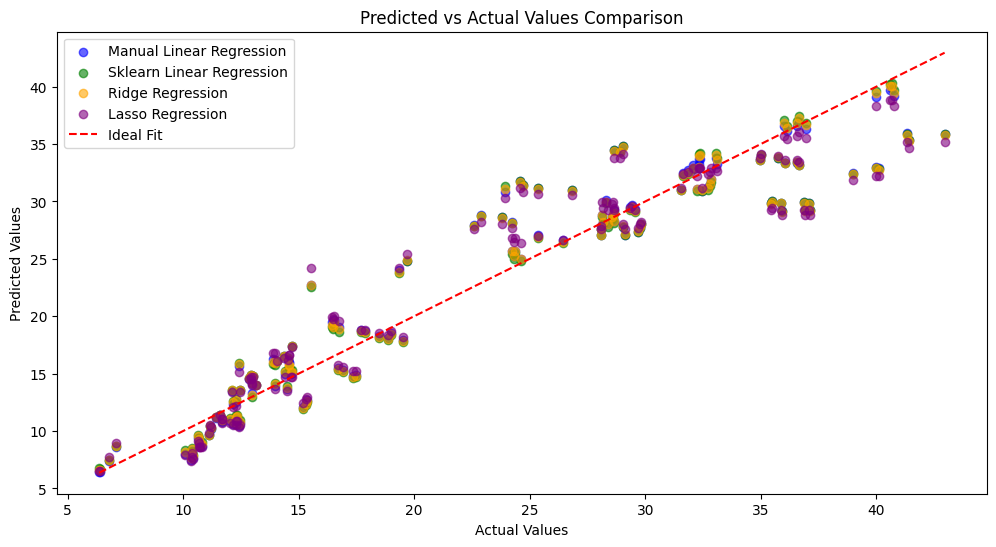

In [66]:

plt.figure(figsize=(12, 6))

# Scatter plots for each model with distinct colors
plt.scatter(y_test_data, y_pred_manual, alpha=0.6, color="blue", label="Manual Linear Regression")
plt.scatter(y_test_data, y_pred_lr, alpha=0.6, color="green", label="Sklearn Linear Regression")
plt.scatter(y_test_data, y_pred_ridge, alpha=0.6, color="orange", label="Ridge Regression")
plt.scatter(y_test_data, y_pred_lasso, alpha=0.6, color="purple", label="Lasso Regression")

# Line representing perfect predictions
plt.plot([y_test_data.min(), y_test_data.max()], [y_test_data.min(), y_test_data.max()], 'k--', color="red", label="Ideal Fit")

# Labels, legend, and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.title("Predicted vs Actual Values Comparison")
plt.show()

section 5

some suggestions(observation ):
1.increase the wall insulation which significantly influences energy eficiency.
2.roof are exposed to significant environment stress for reguation of inside temperature.
3.sealing and weatherproof will increase the effectiveness of insulation
4.integrating the renewable energy resources (like solar energy ).

Feature Importance:
                 Feature  Coefficient
4       Building_Height     7.215464
6          Glazing_Area     2.700051
2            Area_Walls     0.795339
7  Glazing_Distribution     0.327345
5  Building_Orientation    -0.035934
1          Area_Surface    -3.604586
3             Area_Roof    -3.917367
0     Compactness_Ratio    -6.517601


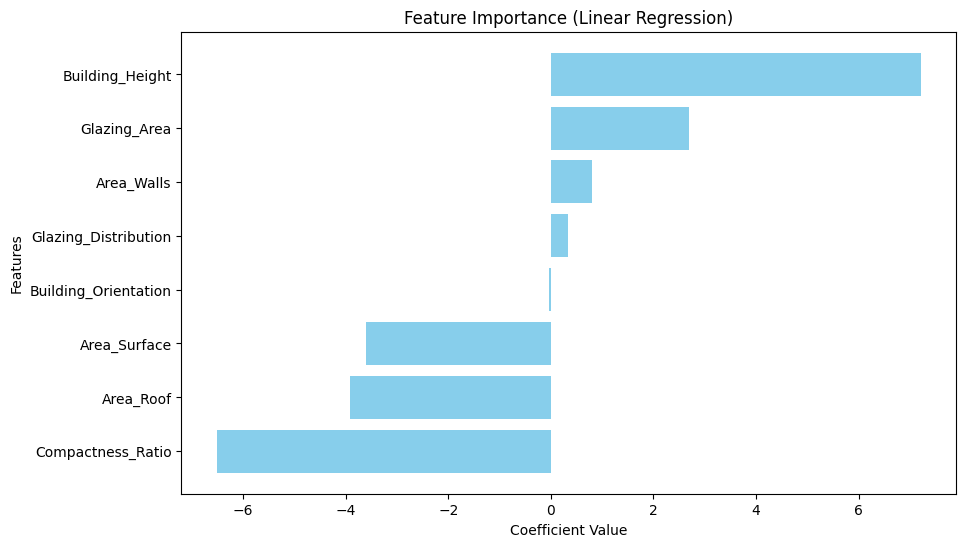

In [68]:

coefficients = pd.DataFrame({
    "Feature": X_features.columns,  # Use feature column names from the dataset
    "Coefficient": linear_reg_model.coef_  # Coefficients from the Linear Regression model
}).sort_values(by="Coefficient", ascending=False)

# Display feature importance
print("Feature Importance:\n", coefficients)

# Plot feature importance for better visualization
plt.figure(figsize=(10, 6))
plt.barh(coefficients["Feature"], coefficients["Coefficient"], color="skyblue")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.title("Feature Importance (Linear Regression)")
plt.gca().invert_yaxis()  # Invert y-axis to show highest coefficients at the top
plt.show()
